<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V7_TVAE_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Input
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [2]:
#original data
url = "https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/tvae_SDV_BreastCancer.csv"
df = pd.read_csv(url)
del df['Unnamed: 0']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,9.866787,14.637137,63.409325,283.713730,0.084223,0.046159,0.016544,0.020951,0.170999,...,13.174990,18.064878,79.308249,368.916148,0.152767,0.166851,0.158809,0.035439,0.288579,0.073689
1,B,12.885053,21.506004,79.229176,336.364127,0.081238,0.061742,0.030052,0.025329,0.169469,...,15.764673,27.487070,81.358017,726.979378,0.112737,0.137944,0.120542,0.071356,0.271750,0.068861
2,B,11.165762,15.516346,84.076405,356.413321,0.112075,0.064143,0.012986,0.000000,0.159183,...,12.177383,34.227039,87.682893,644.261133,0.125459,0.256056,0.112901,0.045699,0.301039,0.055040
3,B,12.271667,19.807824,68.534578,428.143496,0.088438,0.031222,0.028840,0.018988,0.144926,...,14.332578,18.433072,68.255508,505.092414,0.092259,0.116755,0.059426,0.044334,0.235016,0.079151
4,B,7.454015,12.357933,51.167853,202.087605,0.088588,0.052791,0.051511,0.013281,0.174599,...,10.671485,18.960872,60.949763,340.397278,0.127406,0.107711,0.110993,0.000000,0.299682,0.069818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,B,11.653797,19.591590,66.871153,347.640448,0.114469,0.153040,0.098849,0.020412,0.171224,...,13.364227,31.212963,75.105110,309.445867,0.150710,0.268134,0.244718,0.056089,0.251965,0.088369
9996,B,12.779385,13.799951,71.689730,568.975097,0.102959,0.126075,0.107483,0.026956,0.176738,...,14.636441,25.387452,81.755763,675.860482,0.160312,0.562150,0.291571,0.173512,0.298970,0.102903
9997,B,12.144682,17.091324,72.648862,363.638743,0.115953,0.122028,0.112376,0.031809,0.145315,...,12.978866,21.222782,88.692189,534.210501,0.185600,0.492610,0.452870,0.090011,0.243860,0.143752
9998,B,11.440653,14.876270,83.906545,447.719512,0.101748,0.135110,0.069284,0.093306,0.198483,...,14.864455,19.688309,104.210820,711.314226,0.158937,0.555026,0.211123,0.186335,0.263381,0.072269


In [3]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [4]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,6166
M,3834


In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123,stratify=y)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
#print("validation    : ",X_val.shape[0])

Original data :  (10000, 31)
tarin         :  (8000, 30)
test          :  2000


# SVM

In [6]:
# SVM
st = time.time()
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf',probability=True)
svm.fit(X_train, y_train)
send = time.time() - st
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)
(STr,STe, len(y_pred_svm))

(0.951625, 0.951, 2000)

In [7]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train SVM
    st = time.time()
    SCVsvm = SVC(C=0.1, gamma='auto', kernel='rbf', probability=True)
    SCVsvm.fit(X_train, y_train)
    elapsed = time.time() - st

    # Scores
    SCVSTr = SCVsvm.score(SVCX_train, SVCy_train)
    SCVSTe = SCVsvm.score(SVCX_test, SVCy_test)

    # Store metrics
    train_scores.append(SCVSTr)
    test_scores.append(SCVSTe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVSTr:.4f}")
    print(f"Testing Accuracy  : {SCVSTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

SCVSTr = np.mean(train_scores)
SCVSTe = np.mean(test_scores)
SCVsend = np.mean(times)
# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")


Fold 1
Training Accuracy : 0.9526
Testing Accuracy  : 0.9470
Training Time     : 5.72 seconds

Fold 2
Training Accuracy : 0.9500
Testing Accuracy  : 0.9575
Training Time     : 5.79 seconds

Fold 3
Training Accuracy : 0.9523
Testing Accuracy  : 0.9485
Training Time     : 6.70 seconds

Fold 4
Training Accuracy : 0.9500
Testing Accuracy  : 0.9575
Training Time     : 5.67 seconds

Fold 5
Training Accuracy : 0.9526
Testing Accuracy  : 0.9470
Training Time     : 6.69 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9515
Avg Test Accuracy  : 0.9515
Avg Time per Fold  : 6.11 seconds


#ANN

In [8]:
tf.random.set_seed(123)
st = time.time()

ANNmodel = Sequential()
ANNmodel.add(Input(shape=(X_train.shape[1],)))
ANNmodel.add(Dense(30, activation='relu'))
ANNmodel.add(Dense(15, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))

ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
ANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

aend = time.time() - st

ATr = ANNmodel.evaluate(X_train, y_train, verbose=0)[1]
ATe = ANNmodel.evaluate(X_test, y_test, verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test, verbose=0) > 0.5).astype("int32")
ATr,ATe, len(y_pred_ANN)

(0.9589999914169312, 0.953499972820282, 2000)

In [9]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Build and train ANN
    tf.random.set_seed(123)
    st = time.time()

    SCVANNmodel = Sequential()
    SCVANNmodel.add(Input(shape=(X_train.shape[1],)))
    SCVANNmodel.add(Dense(30, activation='relu'))
    SCVANNmodel.add(Dense(15, activation='relu'))
    SCVANNmodel.add(Dense(1, activation='sigmoid'))

    SCVANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
    SCVANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

    elapsed = time.time() - st

    SCVATr = SCVANNmodel.evaluate(SVCX_train, SVCy_train, verbose=0)[1]
    SCVATe = SCVANNmodel.evaluate(SVCX_test, SVCy_test, verbose=0)[1]

    # Store metrics
    train_scores.append(SCVATr)
    test_scores.append(SCVATe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVATr:.4f}")
    print(f"Testing Accuracy  : {SCVATe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

SCVATr = np.mean(train_scores)
SCVATe = np.mean(test_scores)
SCVaend = np.mean(times)
# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9576
Testing Accuracy  : 0.9535
Training Time     : 6.74 seconds

Fold 2
Training Accuracy : 0.9541
Testing Accuracy  : 0.9645
Training Time     : 7.34 seconds

Fold 3
Training Accuracy : 0.9594
Testing Accuracy  : 0.9505
Training Time     : 7.54 seconds

Fold 4
Training Accuracy : 0.9561
Testing Accuracy  : 0.9605
Training Time     : 7.23 seconds

Fold 5
Training Accuracy : 0.9595
Testing Accuracy  : 0.9530
Training Time     : 7.31 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9574
Avg Test Accuracy  : 0.9564
Avg Time per Fold  : 7.23 seconds


In [10]:
#XGBoost
st = time.time()
xgb = XGBClassifier(objective='binary:logistic',max_depth= 6,alpha= 10,learning_rate= 0.03,n_estimators=250)
xgb.fit(X_train, y_train)
xend = time.time() - st
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe, len(y_pred_xgb)

(0.979, 0.947, 2000)

In [11]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train XGBoost model
    st = time.time()
    SCVxgb = XGBClassifier(
        objective='binary:logistic',
        max_depth=6,
        alpha=10,
        learning_rate=0.03,
        n_estimators=250,
        eval_metric='logloss'
    )
    SCVxgb.fit(SVCX_train, SVCy_train)
    elapsed = time.time() - st

    # Predict
    SVCy_pred_xgb = SCVxgb.predict(SVCX_test)

    # Accuracy scores
    SCVXTr = accuracy_score(SVCy_train, SCVxgb.predict(SVCX_train))
    SCVXTe = accuracy_score(SVCy_test, SVCy_pred_xgb)

    # Store metrics
    train_scores.append(SCVXTr)
    test_scores.append(SCVXTe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVXTr:.4f}")
    print(f"Testing Accuracy  : {SCVXTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9781
Testing Accuracy  : 0.9530
Training Time     : 1.99 seconds

Fold 2
Training Accuracy : 0.9775
Testing Accuracy  : 0.9500
Training Time     : 3.74 seconds

Fold 3
Training Accuracy : 0.9779
Testing Accuracy  : 0.9430
Training Time     : 2.00 seconds

Fold 4
Training Accuracy : 0.9766
Testing Accuracy  : 0.9535
Training Time     : 1.99 seconds

Fold 5
Training Accuracy : 0.9776
Testing Accuracy  : 0.9465
Training Time     : 1.96 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9775
Avg Test Accuracy  : 0.9492
Avg Time per Fold  : 2.34 seconds


In [12]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)

st = time.time()
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
kend = time.time() - st
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe, len(y_pred_knn)


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.9170

Number of Neighbors: 3
KNN model train accuracy score: 0.9623
KNN model test accuracy score: 0.9285

Number of Neighbors: 5
KNN model train accuracy score: 0.9563
KNN model test accuracy score: 0.9390

Number of Neighbors: 7
KNN model train accuracy score: 0.9543
KNN model test accuracy score: 0.9410

Number of Neighbors: 9
KNN model train accuracy score: 0.9526
KNN model test accuracy score: 0.9395

Number of Neighbors: 11
KNN model train accuracy score: 0.9507
KNN model test accuracy score: 0.9400

best neighbours:  7


(0.95425, 0.941, 2000)

In [13]:
# Track metrics
train_scores = []
test_scores = []
times = []


# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Find the best n_neighbors for this fold


    # Train with best n_neighbors
    st = time.time()
    SCVknn = KNeighborsClassifier(n_neighbors=3)
    SCVknn.fit(SCVX_train, SCVy_train)
    elapsed = time.time() - st

    SCVKTr = accuracy_score(SCVy_train, SCVknn.predict(SCVX_train))
    SCVKTe = accuracy_score(SCVy_test, SCVknn.predict(SCVX_test))

    # Store metrics
    train_scores.append(SCVKTr)
    test_scores.append(SCVKTe)
    times.append(elapsed)

    # Print results
    print(f"Training Accuracy : {SCVKTr:.4f}")
    print(f"Testing Accuracy  : {SCVKTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9624
Testing Accuracy  : 0.9230
Training Time     : 0.00 seconds

Fold 2
Training Accuracy : 0.9647
Testing Accuracy  : 0.9250
Training Time     : 0.00 seconds

Fold 3
Training Accuracy : 0.9646
Testing Accuracy  : 0.9300
Training Time     : 0.00 seconds

Fold 4
Training Accuracy : 0.9614
Testing Accuracy  : 0.9380
Training Time     : 0.00 seconds

Fold 5
Training Accuracy : 0.9605
Testing Accuracy  : 0.9335
Training Time     : 0.00 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9627
Avg Test Accuracy  : 0.9299
Avg Time per Fold  : 0.00 seconds


In [14]:
#RF
st = time.time()
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
rend = time.time() - st
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe, len(y_pred_rf)

(0.944625, 0.935, 2000)

In [15]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train Random Forest
    st = time.time()
    SCVrf = RandomForestClassifier(
        n_estimators=500,
        max_features='sqrt',
        max_samples=100,
        random_state=123
    )
    SCVrf.fit(SCVX_train, SCVy_train)
    elapsed = time.time() - st

    SCVRTr = accuracy_score(SCVy_train, SCVrf.predict(SCVX_train))
    SCVRTe = accuracy_score(SCVy_test, SCVrf.predict(SCVX_test))

    # Store metrics
    train_scores.append(SCVRTr)
    test_scores.append(SCVRTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVRTr:.4f}")
    print(f"Testing Accuracy  : {SCVRTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9421
Testing Accuracy  : 0.9455
Training Time     : 1.18 seconds

Fold 2
Training Accuracy : 0.9441
Testing Accuracy  : 0.9400
Training Time     : 0.94 seconds

Fold 3
Training Accuracy : 0.9479
Testing Accuracy  : 0.9345
Training Time     : 0.96 seconds

Fold 4
Training Accuracy : 0.9427
Testing Accuracy  : 0.9490
Training Time     : 0.95 seconds

Fold 5
Training Accuracy : 0.9449
Testing Accuracy  : 0.9320
Training Time     : 1.25 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9444
Avg Test Accuracy  : 0.9402
Avg Time per Fold  : 1.06 seconds


In [16]:
#LR
st = time.time()
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
lend = time.time() - st
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe, len(y_pred_lr)

(0.9505, 0.952, 2000)

In [17]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold CV loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train Logistic Regression model
    st = time.time()
    SCVlr = LogisticRegression(
        C=0.1,
        penalty='l1',
        solver='liblinear',
        max_iter=1000,
        random_state=123
    )
    SCVlr.fit( SCVX_train,  SCVy_train)
    elapsed = time.time() - st

    SCVLTr = accuracy_score( SCVy_train, SCVlr.predict( SCVX_train))
    SCVLTe = accuracy_score( SCVy_test, SCVlr.predict( SCVX_test))


    # Store metrics
    train_scores.append(SCVLTr)
    test_scores.append(SCVLTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVLTr:.4f}")
    print(f"Testing Accuracy  : {SCVLTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9509
Testing Accuracy  : 0.9445
Training Time     : 0.05 seconds

Fold 2
Training Accuracy : 0.9494
Testing Accuracy  : 0.9515
Training Time     : 0.04 seconds

Fold 3
Training Accuracy : 0.9515
Testing Accuracy  : 0.9445
Training Time     : 0.04 seconds

Fold 4
Training Accuracy : 0.9484
Testing Accuracy  : 0.9555
Training Time     : 0.04 seconds

Fold 5
Training Accuracy : 0.9517
Testing Accuracy  : 0.9450
Training Time     : 0.04 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9504
Avg Test Accuracy  : 0.9482
Avg Time per Fold  : 0.04 seconds


In [18]:
'''
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')

    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final
  '''

'\ndef CVal(ML):\n\n  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")\n  del df[\'id\']\n\n  s = 0\n  e = round(df.shape[0]*.2)\n\n  y_pred = []\n  y_original = []\n\n  for i in range(5):\n\n    test_set  = df.iloc[s:e,:]\n    train_set = df.drop(test_set.index)\n\n    X_train = StandardScaler().fit_transform(train_set.drop(columns=[\'diagnosis\'])).copy()\n    y_train = encoder.fit_transform(train_set[\'diagnosis\']).copy()\n    X_test = StandardScaler().fit_transform(test_set.drop(columns=[\'diagnosis\'])).copy()\n    y_test = encoder.fit_transform(test_set[\'diagnosis\']).copy()\n\n    #svm = SVC(C=0.1, gamma=\'auto\', kernel = \'rbf\')\n\n    ML.fit(X_train, y_train)\n    y_pred_ML = ML.predict(X_test)\n\n\n    y_pred.append(y_pred_ML)\n    y_original.append(y_test)\n\n    s = e\n    e = e + round(df.shape[0]*.2)\n    if e-s < round(df.shape[0]*.2):\n      e = df.shape[0]+1\n\n  y_pred_final = []\n  y_original_final = []\n\n  t

In [19]:
def CVal(ML):
    # Load and clean dataset
    df = pd.read_csv(url)
    del df['Unnamed: 0']

    # Separate features and target
    X = df.drop(columns=['diagnosis']).copy()
    y = df['diagnosis'].copy()

    # Encode labels
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Prepare StratifiedKFold

    SCVy_pred = []
    SCVy_original = []

    for train_index, test_index in skf.split(X, y):
        # Split data
        SCVX_train, SCVX_test = X.iloc[train_index], X.iloc[test_index]
        SCVy_train, SCVy_test = y[train_index], y[test_index]

        # Standardize
        scaler = StandardScaler().fit(SCVX_train)
        SCVX_train = scaler.transform(SCVX_train)
        SCVX_test = scaler.transform(SCVX_test)

        # Train model
        ML.fit(SCVX_train, SCVy_train)
        SCVy_pred_ML = ML.predict(SCVX_test)

        # Collect predictions
        SCVy_pred.append(SCVy_pred_ML)
        SCVy_original.append(SCVy_test)

    # Flatten predictions and true labels
    SCVy_pred_final = []
    SCVy_original_final = []

    for i in range(5):
        for j in range(len(SCVy_pred[i])):
            SCVy_pred_final.append(SCVy_pred[i][j])
            SCVy_original_final.append(SCVy_original[i][j])

    return SCVy_pred_final


In [20]:
'''
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(15, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final
  '''

'\ndef CValANN():\n\n  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")\n  del df[\'id\']\n\n  s = 0\n  e = round(df.shape[0]*.2)\n\n  y_pred = []\n  y_original = []\n\n  for i in range(5):\n\n    test_set  = df.iloc[s:e,:]\n    train_set = df.drop(test_set.index)\n\n    X_train = StandardScaler().fit_transform(train_set.drop(columns=[\'diagnosis\'])).copy()\n    y_train = encoder.fit_transform(train_set[\'diagnosis\']).copy()\n    X_test = StandardScaler().fit_transform(test_set.drop(columns=[\'diagnosis\'])).copy()\n    y_test = encoder.fit_transform(test_set[\'diagnosis\']).copy()\n\n    #svm = SVC(C=0.1, gamma=\'auto\', kernel = \'rbf\')\n    tf.random.set_seed(123)\n    ANNmodel = Sequential()\n    ANNmodel.add(Dense(30, activation=\'relu\', input_shape=(X_train.shape[1],)))\n    ANNmodel.add(Dense(15, activation=\'relu\'))\n    ANNmodel.add(Dense(1, activation=\'sigmoid\'))\n    ANNmodel.compile(loss=\'BinaryCrossentropy\', op

In [21]:
def CValANN():
    # Load and preprocess dataset
    df = pd.read_csv(url)
    del df['Unnamed: 0']

    X = df.drop(columns=['diagnosis']).copy()
    y = df['diagnosis'].copy()

    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    SCVy_pred = []
    SCVy_original = []

    for train_index, test_index in skf.split(X, y):
        SCVX_train, SCVX_test = X.iloc[train_index], X.iloc[test_index]
        SCVy_train, SCVy_test = y[train_index], y[test_index]

        # Standardize
        scaler = StandardScaler().fit(SCVX_train)
        SCVX_train = scaler.transform(SCVX_train)
        SCVX_test = scaler.transform(SCVX_test)

        # ANN Model
        tf.random.set_seed(123)
        ANNmodel = Sequential()
        ANNmodel.add(Input(shape=(X_train.shape[1],)))
        ANNmodel.add(Dense(30, activation='relu'))
        ANNmodel.add(Dense(15, activation='relu'))
        ANNmodel.add(Dense(1, activation='sigmoid'))
        ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
        ANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

        SCVy_pred_ANN = (ANNmodel.predict(SCVX_test, verbose=0) > 0.5).astype("int32")

        SCVy_pred.append(SCVy_pred_ANN)
        SCVy_original.append(SCVy_test)

    SCVy_pred_fina = []
    SCVy_original_final = []

    try:
        for i in range(5):
            for j in range(len(SCVy_pred[i])):
                SCVy_pred_fina.append(SCVy_pred[i][j])
                SCVy_original_final.append(SCVy_original[i][j])
    except:
        pass

    SCVy_pred_final = [val[0] for val in SCVy_pred_fina]

    return SCVy_pred_final


In [22]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

In [23]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0
3,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0


In [24]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

st = time.time()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(DX_train.shape[1],)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2, verbose=0)
dend = time.time() - st

In [25]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
y_pred_DNN = (model.predict(DX_test) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe, len(y_pred_DNN)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(0.6151250004768372, 0.6225000023841858, 2000)

In [26]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import time

# Prepare data
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata['y_test'].copy()

# Encode labels if necessary
encoder = LabelEncoder()
DNNY = encoder.fit_transform(DNNY)

# Standardize features
scaler = StandardScaler()
DNNX = scaler.fit_transform(DNNX)

# Stratified K-Fold initialization
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold CV loop
for fold, (train_index, test_index) in enumerate(skf.split(DNNX, DNNY)):
    SCVX_train, SCVX_test = DNNX[train_index], DNNX[test_index]
    SCVy_train, SCVy_test = DNNY[train_index], DNNY[test_index]

    print(f"\nFold {fold+1}")

    # Train DNN
    tf.random.set_seed(123)
    st = time.time()

    SCVmodel = tf.keras.Sequential([
        tf.keras.Input(shape=(SCVX_train.shape[1],)),
        tf.keras.layers.Dense(30, activation='relu',),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    SCVmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    SCVmodel.fit(SCVX_train, SCVy_train, epochs=500, batch_size=64, validation_split=0.2, verbose=0)

    elapsed = time.time() - st

    # Evaluation
    SCVDTr = model.evaluate(SCVX_train, SCVy_train, verbose=0)[1]
    SCVDTe = model.evaluate(SCVX_test, SCVy_test, verbose=0)[1]

    # Store metrics
    train_scores.append(SCVDTr)
    test_scores.append(SCVDTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVDTr:.4f}")
    print(f"Testing Accuracy  : {SCVDTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.6165
Testing Accuracy  : 0.6170
Training Time     : 258.29 seconds

Fold 2
Training Accuracy : 0.6166
Testing Accuracy  : 0.6165
Training Time     : 257.96 seconds

Fold 3
Training Accuracy : 0.6166
Testing Accuracy  : 0.6165
Training Time     : 255.63 seconds

Fold 4
Training Accuracy : 0.6166
Testing Accuracy  : 0.6165
Training Time     : 248.98 seconds

Fold 5
Training Accuracy : 0.6166
Testing Accuracy  : 0.6165
Training Time     : 251.82 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.6166
Avg Test Accuracy  : 0.6166
Avg Time per Fold  : 254.54 seconds


In [27]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe, SCVSTr,SCVSTe],
    "KNN":[KTr,KTe, SCVKTr,SCVKTe],
    "RF" :[RTr,RTe, SCVRTr,SCVRTe],
    "LR" :[LTr,LTe, SCVLTr,SCVLTe],
    "ANN":[ATr,ATe, SCVATr,SCVATe],
    "XGB":[XTr,XTe, SCVXTr,SCVXTe],
    "DNN":[DTr,DTe, SCVDTr,SCVDTe]})
acc.index = ["train", "test", "SCVTrain", "SCVTest"]
acc = acc.T
acc

,train,test,SCVTrain,SCVTest
SVM,0.951625,0.9510,0.951500,0.9515
KNN,0.954250,0.9410,0.960500,0.9335
RF,0.944625,0.9350,0.944875,0.9320
LR,0.950500,0.9520,0.951750,0.9450
ANN,0.959000,0.9535,0.957350,0.9564
XGB,0.979000,0.9470,0.977625,0.9465
DNN,0.615125,0.6225,0.616625,0.6165


### **AutoML Individual and AutoML DNN**

In [28]:
#H2O AutoML

In [29]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.8 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw4zpdxas
  JVM stdout: /tmp/tmpw4zpdxas/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpw4zpdxas/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_unknownUser_6lqi07
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [30]:
#train, valid = hdf.split_frame(ratios=[.8], seed=123)
#hdf = h2o.H2OFrame(df)
#hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hy = "diagnosis"
hx = list(df.columns)
hx.remove(hy)
hdf  = df.copy()
hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
train = h2o.H2OFrame(train1)
valid = h2o.H2OFrame(valid1)
train["diagnosis"] = train["diagnosis"].asfactor()
valid["diagnosis"] = valid["diagnosis"].asfactor()

st = time.time()
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", sort_metric='accuracy')
aml.train(x = hx, y = hy, training_frame = train,
          validation_frame = valid)
autoend = time.time() - st

best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:45:42.592: Project: AutoML_1_20250511_44542
04:45:42.600: 5-fold cross-validation will be used.
04:45:42.601: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
04:45:42.649: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
04:45:42.649: Build control seed: 123
04:45:42.650: training frame: Frame key: AutoML_1_20250511_44542_training_py_1_sid_992e    cols: 31    rows: 8000  chunks: 2    size: 1926169  checksum: -5600652261642703400
04:45:42.678: validation frame: Frame key: py_2_sid_992e    cols: 31    rows: 2000  chunks: 1    size: 482

In [31]:
#y_pred_h2o = pd.DataFrame(h2o.as_list(best_model.predict(valid)))['predict']
y_pred_h2o = np.array(best_model.predict(valid).as_data_frame(use_multi_thread=True)['predict'])
y_test_h2o = np.array(valid1['diagnosis']).copy().astype(np.int32)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [32]:
lb = aml.leaderboard
lb.head()

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20250511_44542,0.9455,0.988982,0.149527,0.984216,0.0557493,0.202933,0.041182
XGBoost_1_AutoML_1_20250511_44542,0.945875,0.99039,0.125461,0.985588,0.055058,0.197167,0.0388748
XRT_1_AutoML_1_20250511_44542,0.946625,0.988829,0.153585,0.984227,0.0563127,0.202666,0.0410733
GBM_2_AutoML_1_20250511_44542,0.94725,0.990504,0.124893,0.986052,0.0543658,0.195549,0.0382392
XGBoost_3_AutoML_1_20250511_44542,0.947625,0.990484,0.127248,0.98584,0.053514,0.196228,0.0385052
XGBoost_2_AutoML_1_20250511_44542,0.948125,0.989967,0.130669,0.98457,0.0528644,0.197123,0.0388576
GBM_4_AutoML_1_20250511_44542,0.948625,0.990571,0.125997,0.985955,0.0532482,0.195963,0.0384014
GBM_3_AutoML_1_20250511_44542,0.948625,0.990845,0.123299,0.986349,0.0553756,0.193956,0.0376188
GBM_1_AutoML_1_20250511_44542,0.949,0.990841,0.119728,0.986401,0.0531257,0.192242,0.036957
GLM_1_AutoML_1_20250511_44542,0.94975,0.990569,0.120531,0.986194,0.0534886,0.192392,0.0370148


In [33]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20250511_44542


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    46                 46                          199283                 15           20           18.2174       311           369           340

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04326800279168445
RMSE: 0.2080096218728462
LogLoss: 0.20428151575245085
Mean Per-Class Error: 0.057211674235314855
AUC: 0.9860384526971423
AUCPR: 0.9800859943345126
Gini: 0.9720769053942846

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4666666666666667
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      4652  269   0.0547   (269.0/4921.0)
1      184   2895  0.0598   (184.0/3079.0)
Total  4836  3164  0.0566   (453.0/8000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.466667     0.927439  105
max f2                       0.294118     0.945237  140
max f0point5                 0.647059     0.94207   70
max accuracy                 0.5          0.94375   100
max precision                0.956522     0.998262  4
max recall                   0            1         197
max specificity              1            0.99939   0
max absolute_mcc             0.5          0.881501  100
max min_per_class_accuracy   0.454545     0.942839  108
max mean_per_class_accuracy  0.45         0.943213  109
max tns                      1            4918      0
max fns                      1            1374      0
max fps                      0            4921      197
max tps                      0            3079      197
max tnr                      1            0.99939   0
max fnr                      1            0.446249  0
max fpr                      0            1         197
max tpr                      0            1         197

Gains/Lift Table: Avg response rate: 38.49 %, avg score: 38.54 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.2135                      1                  2.59368    2.59368            0.998244         1          0.998244                    1                   0.553751        0.553751                   159.368   159.368            0.553142
2        0.30125                     0.789474           2.47611    2.55943            0.952991         0.893171   0.985062                    0.968882            0.217278        0.77103                    147.611   155.943            0.763714
3        0.40025                     0.444444           1.75841    2.3613             0.676768         0.62211    0.908807                    0.88311             0.174082        0.945112                   75.8409   136.13             0.885775
4        0.504                       0.117647           0.438258   1.96544            0.168675         0.255875   0.756448                    0.753991            0.0454693       0.990581                   -56.1742  96.5439            0.791028
5        1                           0                  0.0189892  1                  0.00730847       0.0108765  0.384875                    0.385406 

In [34]:
best_model.model_performance(train).accuracy()

[[0.5434782608695652, 1.0]]

In [35]:
y_test_h2o

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [36]:
def SCVhdf(df):
  #train, valid = hdf.split_frame(ratios=[.8], seed=123)
  #hdf = h2o.H2OFrame(df)
  #hdf["diagnosis"] = hdf["diagnosis"].asfactor()
  hy = "diagnosis"
  hx = list(df.columns)
  hx.remove(hy)
  hdf  = df.copy()
  hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
  hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
  hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
  train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
  train = h2o.H2OFrame(train1)
  valid = h2o.H2OFrame(valid1)
  train["diagnosis"] = train["diagnosis"].asfactor()
  valid["diagnosis"] = valid["diagnosis"].asfactor()

  st = time.time()
  aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=5, sort_metric='accuracy')
  aml.train(x = hx, y = hy, training_frame = train,
            validation_frame = valid)
  autoend = time.time() - st

  best_model = aml.get_best_model()
  HATr  = best_model.model_performance(train)
  HATe  = best_model.model_performance(valid)
  return HATr, HATe
SCVHATr, SCVHATe = SCVhdf(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:50:35.411: Project: AutoML_2_20250511_45035
04:50:35.411: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
04:50:35.422: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
04:50:35.423: Build control seed: 123
04:50:35.423: training frame: Frame key: AutoML_2_20250511_45035_training_py_11_sid_992e    cols: 31    rows: 8000  chunks: 2    size: 1926169  checksum: -5600652261642703400
04:50:35.423: validation frame: Frame key: py_12_sid_992e    cols: 31    rows: 2000  chunks: 1    size: 482912  checksum: -8629894929602001568
04:50:35.423: 

In [37]:
#SFOLD DATA AUTOML
#strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
shdf  = newdata.copy()
#shdf['y_test'] = shdf['y_test'].replace(0,"B")
#shdf['y_test'] = shdf['y_test'].replace(1,"M")
shy = "y_test"
shx = list(shdf.columns)
shx.remove(shy)

shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
#shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
strain = h2o.H2OFrame(strain1)
svalid = h2o.H2OFrame(svalid1)
strain["y_test"] = strain["y_test"].asfactor()
svalid["y_test"] = svalid["y_test"].asfactor()

st = time.time()


saml = H2OAutoML(include_algos = ['DeepLearning'],max_models = 10, seed = 123, verbosity="info", sort_metric='accuracy')


saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sautoend = time.time() - st
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

<ipython-input-37-5d92bdc4dfd6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.78321369 -0.78321369  1.27679076 ... -0.78321369 -0.78321369
 -0.78321369]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
<ipython-input-37-5d92bdc4dfd6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.75635961 -0.75635961  1.32212242 ... -0.75635961 -0.75635961
 -0.75635961]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
<ipython-input-37-5d92bdc4dfd6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.76701371 -0.76701371  1.30375765 ... -0.76701371 -0.76701371

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:54:02.208: Project: AutoML_3_20250511_45402
04:54:02.208: 5-fold cross-validation will be used.
04:54:02.208: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
04:54:02.210: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
04:54:02.210: Build control seed: 123
04:54:02.210: training frame: Frame key: AutoML_3_20250511_45402_training_py_18_sid_992e    cols: 7    rows: 8000  chunks: 1    size: 98174  checksum: 4151123124086364224
04:54:02.210: validation frame: Frame key: py_19_sid_992e    cols: 7    rows: 2000  chunks: 1    size: 25424 

In [38]:
sHATe

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.23499696443004384
RMSE: 0.48476485478017467
LogLoss: 0.6628329491300959
Mean Per-Class Error: 0.49905582595281794
AUC: 0.5004500119684034
AUCPR: 0.37771108210713755
Gini: 0.0009000239368068819

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3580351798044616
       0    1     Error    Rate
-----  ---  ----  -------  ---------------
0      4    1241  0.9968   (1241.0/1245.0)
1      1    754   0.0013   (1.0/755.0)
Total  5    1995  0.621    (1242.0/2000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value       idx
---------------------------  -----------  ----------  -----
max f1                       0.358035     0.548364    1
max f2                       0.338531     0.751992    3
max f0point5                 0.358035     0.431597    1
max accuracy                 0.381993     0.38        0
max precision                0.358035     0.377945    1
max recall                   0.338531     1           3
max specificity              0.381993     0.00883534  0
max absolute_mcc             0.358035     0.0183309   1
max min_per_class_accuracy   0.381993     0.00883534  0
max mean_per_class_accuracy  0.358035     0.500944    1
max tns                      0.381993     11          0
max fns                      0.381993     6           0
max fps                      0.338531     1245        3
max tps                      0.338531     755         3
max tnr                      0.381993     0.00883534  0
max fnr                      0.381993     0.00794702  0
max fpr                      0.338531     1           3
max tpr                      0.338531     1           3

Gains/Lift Table: Avg response rate: 37.75 %, avg score: 38.17 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.9915                      0.381993           1.00056   1.00056            0.377711         0.381993  0.377711                    0.381993            0.992053        0.992053                   0.0557721  0.0557721          0.000888321
2        1                           0.338531           0.934944  1                  0.352941         0.353063  0.3775                      0.381747            0.00794702      1                          -6.50565   0                  0

In [39]:
def SCVshdf(newdata):
  #SFOLD DATA AUTOML
  #strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
  shdf  = newdata.copy()
  #shdf['y_test'] = shdf['y_test'].replace(0,"B")
  #shdf['y_test'] = shdf['y_test'].replace(1,"M")
  shy = "y_test"
  shx = list(shdf.columns)
  shx.remove(shy)

  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
  #shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
  strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
  strain = h2o.H2OFrame(strain1)
  svalid = h2o.H2OFrame(svalid1)
  strain["y_test"] = strain["y_test"].asfactor()
  svalid["y_test"] = svalid["y_test"].asfactor()

  st = time.time()


  saml = H2OAutoML(include_algos = ['DeepLearning'],max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')


  saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
  sautoend = time.time() - st
  sbest_model = saml.get_best_model()
  sHATr  = sbest_model.model_performance(strain)
  sHATe  = sbest_model.model_performance(svalid)
  return sHATr, sHATe
SCVsHATr, SCVsHATe = SCVshdf(newdata)

<ipython-input-39-e7350dacbebd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.78321369 -0.78321369  1.27679076 ... -0.78321369 -0.78321369
 -0.78321369]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
<ipython-input-39-e7350dacbebd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.75635961 -0.75635961  1.32212242 ... -0.75635961 -0.75635961
 -0.75635961]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
<ipython-input-39-e7350dacbebd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.76701371 -0.76701371  1.30375765 ... -0.76701371 -0.76701371

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
05:19:04.856: Project: AutoML_4_20250511_51904
05:19:04.856: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
05:19:04.856: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
05:19:04.856: Build control seed: 123
05:19:04.856: training frame: Frame key: AutoML_4_20250511_51904_training_py_25_sid_992e    cols: 7    rows: 8000  chunks: 1    size: 98174  checksum: 4151123124086364224
05:19:04.857: validation frame: Frame key: py_26_sid_992e    cols: 7    rows: 2000  chunks: 1    size: 25420  checksum: 2749308288354286000
05:19:04.857: leaderb

In [40]:
sbest_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_3_20250511_45402_model_1


Status of Neuron Layers: predicting y_test, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,022 weights/biases, 17.6 KB, 4,320,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  ---------------------  ----------  ---------------------  -------------------  -------------------  -------------------
    1        6        Input             0.0
    2        20       RectifierDropout  20.0       0.0   0.0   0.013397289246010283  0.004017660394310951   0.0         0.0145830828754697     0.26771318912506104  0.49165290474612117  0.16742491722106934
    3        20       RectifierDropout  20.0       0.0   0.0   0.013866131997783668  0.007735779508948326   0.0         -0.025035389709519223  0.23208606243133545  0.991253211621539    0.36113715171813965
    4        20       RectifierDropout  20.0       0.0   0.0   0.02388234801710496   0.056140437722206116   0.0         -0.1332608322476153    0.2145683765411377   0.7505397196725101   0.11379501223564148
    5        2        Softmax                      0.0   0.0   0.003565615729894489  0.0006051815580576658  0.0         -0.06399191338568926   0.9000735282897949   -1.381687305456484   0.23710352182388306

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.23670299039932585
RMSE: 0.4865213154624634
LogLoss: 0.6663066433567832
Mean Per-Class Error: 0.4989422350236695
AUC: 0.5020629617986928
AUCPR: 0.3858574515671996
Gini: 0.004125923597385617

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3580351798044616
       0    1     Error    Rate
-----  ---  ----  -------  ---------------
0      20   4901  0.9959   (4901.0/4921.0)
1      6    3073  0.0019   (6.0/3079.0)
Total  26   7974  0.6134   (4907.0/8000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value       idx
---------------------------  -----------  ----------  -----
max f1                       0.358035     0.556048    1
max f2                       0.338531     0.757777    3
max f0point5                 0.381993     0.439537    0
max accuracy                 0.381993     0.3895      0
max precision                0.381993     0.385861    0
max recall                   0.338531     1           3
max specificity              0.381993     0.0132087   0
max absolute_mcc             0.381993     0.0186783   0
max min_per_class_accuracy   0.381993     0.0132087   0
max mean_per_class_accuracy  0.381993     0.502057    0
max tns                      0.381993     65          0
max fns                      0.381993     28          0
max fps                      0.338531     4921        3
max tps                      0.338531     3079        3
max tnr                      0.381993     0.0132087   0
max fnr                      0.381993     0.00909386  0
max fpr                      0.338531     1           3
max tpr                      0.338531     1           3

Gains/Lift Table: Avg response rate: 38.49 %, avg score: 38.17 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.988375                    0.381993           1.00256   1.00256            0.385861         0.381993  0.385

In [41]:
saml.leaderboard

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid_3_AutoML_3_20250511_45402_model_1,0.568125,0.500968,0.666451,0.384851,0.5,0.486591,0.23677
DeepLearning_grid_3_AutoML_3_20250511_45402_model_2,0.569875,0.501362,0.666483,0.386113,0.5,0.486601,0.23678
DeepLearning_grid_3_AutoML_3_20250511_45402_model_3,0.570875,0.501795,0.666399,0.386582,0.5,0.486565,0.236746
DeepLearning_grid_1_AutoML_3_20250511_45402_model_1,0.61525,0.495141,0.670058,0.38182,0.499248,0.488201,0.238341
DeepLearning_1_AutoML_3_20250511_45402,0.61525,0.494841,0.675337,0.38434,0.499797,0.490201,0.240297
DeepLearning_grid_2_AutoML_3_20250511_45402_model_2,0.615625,0.505901,0.666603,0.391793,0.498537,0.486678,0.236856
DeepLearning_grid_1_AutoML_3_20250511_45402_model_3,0.615625,0.50384,0.667207,0.386869,0.499797,0.486913,0.237085
DeepLearning_grid_1_AutoML_3_20250511_45402_model_2,0.616,0.504322,0.667651,0.391556,0.499389,0.486946,0.237116
DeepLearning_grid_2_AutoML_3_20250511_45402_model_3,0.616125,0.509476,0.666515,0.39488,0.498454,0.486479,0.236662
DeepLearning_grid_2_AutoML_3_20250511_45402_model_1,0.6165,0.50603,0.666163,0.393453,0.498353,0.486455,0.236639


In [42]:
!pip install polars pyarrow

In [43]:
#y_pred_sh2o = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))['predict']
y_pred_sh2o = np.array(pd.DataFrame(sbest_model.predict(svalid).as_data_frame(use_multi_thread=True))['predict'])
y_test_sh2o = np.array(svalid1['y_test']).copy()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [44]:
y_pred_sh2o

array([1, 1, 1, ..., 1, 1, 1])

<BarContainer object of 7 artists>

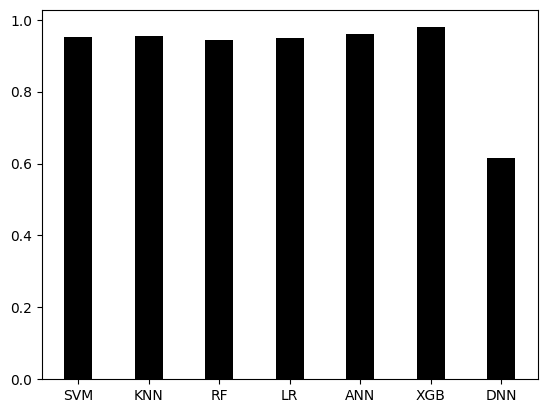

In [45]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [46]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

label = ["ArtificialNeuralNetwork", 'DeepNeuralNetwork',
         'KNearestNeighborsClassifier', 'LogisticRegression',
         'RandomForestClassifier', 'SupportVectorClassifier',
         'XGBoost', type(best_model).__name__, type(sbest_model).__name__ ]

acc = pd.DataFrame(
    {
    "ANN":[ATr,ATe, SCVATr,SCVATe],
    "DNN":[DTr,DTe, SCVDTr,SCVDTe],
    "KNN":[KTr,KTe, SCVKTr,SCVKTe],
    "LR" :[LTr,LTe, SCVLTr,SCVLTe],
    "RF" :[RTr,RTe, SCVRTr,SCVRTe],
    "SVM":[STr,STe, SCVSTr,SCVSTe],
    "XGB":[XTr,XTe, SCVXTr,SCVXTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1], SCVHATr.accuracy()[0][1], SCVHATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1], SCVsHATr.accuracy()[0][1], SCVsHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test", "SCVTrain", "SCVTest"]
acc = acc.T
acc['Model'] = label

acc = acc[['Model', 'train', 'test', "SCVTrain", "SCVTest"]]
#acc['avg'] = round((acc['train'] + acc['test'])/2, 6)
#acc[acc["avg"] == acc["avg"].max()]
#acc['BestModel'] = 0

acc["Precision"] = np.zeros(len(acc))
acc["Recall"]    = np.zeros(len(acc))
acc["F1_Score"]  = np.zeros(len(acc))



In [47]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.959000,0.9535,0.957350,0.9564,0.0,0.0,0.0
DNN,DeepNeuralNetwork,0.615125,0.6225,0.616625,0.6165,0.0,0.0,0.0
KNN,KNearestNeighborsClassifier,0.954250,0.9410,0.960500,0.9335,0.0,0.0,0.0
LR,LogisticRegression,0.950500,0.9520,0.951750,0.9450,0.0,0.0,0.0
RF,RandomForestClassifier,0.944625,0.9350,0.944875,0.9320,0.0,0.0,0.0
SVM,SupportVectorClassifier,0.951625,0.9510,0.951500,0.9515,0.0,0.0,0.0
XGB,XGBoost,0.979000,0.9470,0.977625,0.9465,0.0,0.0,0.0
H_OD,H2ORandomForestEstimator,1.000000,0.9530,1.000000,0.9530,0.0,0.0,0.0
H_SOD,H2ODeepLearningEstimator,0.389500,0.3800,0.384875,0.3775,0.0,0.0,0.0


In [48]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.959000,0.9535,0.957350,0.9564,0.0,0.0,0.0
DNN,DeepNeuralNetwork,0.615125,0.6225,0.616625,0.6165,0.0,0.0,0.0
KNN,KNearestNeighborsClassifier,0.954250,0.9410,0.960500,0.9335,0.0,0.0,0.0
LR,LogisticRegression,0.950500,0.9520,0.951750,0.9450,0.0,0.0,0.0
RF,RandomForestClassifier,0.944625,0.9350,0.944875,0.9320,0.0,0.0,0.0
SVM,SupportVectorClassifier,0.951625,0.9510,0.951500,0.9515,0.0,0.0,0.0
XGB,XGBoost,0.979000,0.9470,0.977625,0.9465,0.0,0.0,0.0
H_OD,H2ORandomForestEstimator,1.000000,0.9530,1.000000,0.9530,0.0,0.0,0.0
H_SOD,H2ODeepLearningEstimator,0.389500,0.3800,0.384875,0.3775,0.0,0.0,0.0


In [49]:
y_pred_ANNn = []
y_pred_DNNn = []
for i in range(len(y_pred_ANN)):
  y_pred_ANNn.append(y_pred_ANN[i][0])
  y_pred_DNNn.append(y_pred_DNN[i][0])

In [50]:
pred = [np.array(y_pred_ANNn), np.array(y_pred_DNNn), y_pred_knn,
        y_pred_lr, y_pred_rf,
        y_pred_svm, y_pred_xgb, y_pred_h2o, y_pred_sh2o]

tes  = [y_test_indi_ML, np.array(Dy_test), y_test_indi_ML, y_test_indi_ML,
        y_test_indi_ML, y_test_indi_ML, y_test_indi_ML,
        y_test_h2o.copy(), y_test_sh2o.copy()]

In [51]:
tes

[array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 1, ..., 0, 0, 0])]

In [52]:
acc.iloc[:,5]

,Precision
ANN,0.0
DNN,0.0
KNN,0.0
LR,0.0
RF,0.0
SVM,0.0
XGB,0.0
H_OD,0.0
H_SOD,0.0


In [53]:
for i in range(len(pred)):
  p,r,f,_ = precision_recall_fscore_support(tes[i], pred[i],
                                            average='macro',zero_division=0)
  acc.iloc[i,5]= p
  acc.iloc[i,6]= r
  acc.iloc[i,7]= f
  p = 0
  r = 0
  f = 0
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.959000,0.9535,0.957350,0.9564,0.949463,0.952678,0.951009
DNN,DeepNeuralNetwork,0.615125,0.6225,0.616625,0.6165,0.311250,0.500000,0.383667
KNN,KNearestNeighborsClassifier,0.954250,0.9410,0.960500,0.9335,0.942421,0.932439,0.936931
LR,LogisticRegression,0.950500,0.9520,0.951750,0.9450,0.949443,0.948998,0.949219
RF,RandomForestClassifier,0.944625,0.9350,0.944875,0.9320,0.934651,0.927327,0.930704
SVM,SupportVectorClassifier,0.951625,0.9510,0.951500,0.9515,0.947805,0.948680,0.948238
XGB,XGBoost,0.979000,0.9470,0.977625,0.9465,0.944348,0.943465,0.943902
H_OD,H2ORandomForestEstimator,1.000000,0.9530,1.000000,0.9530,0.947959,0.952866,0.950277
H_SOD,H2ODeepLearningEstimator,0.389500,0.3800,0.384875,0.3775,0.588972,0.500944,0.277382


<BarContainer object of 9 artists>

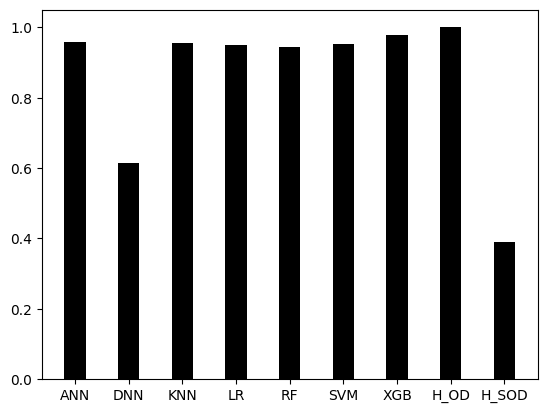

In [54]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

In [56]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

In [57]:
#encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()

In [58]:
from sklearn import metrics

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


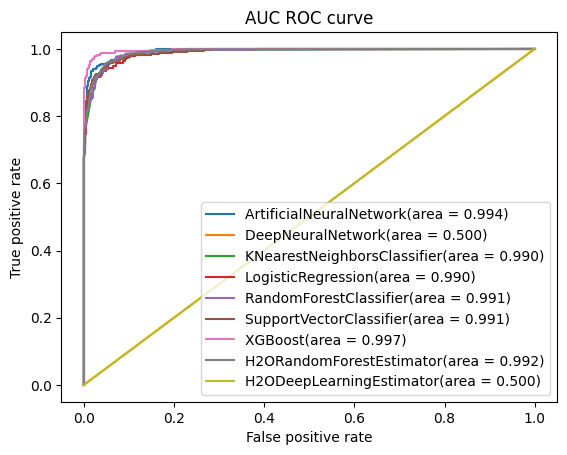

In [59]:
plt.figure(1)
plt.rcParams["figure.figsize"] = [10, 5]

y_pred = ANNmodel.predict(X_test).ravel()
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[0]) + '(area = {:.3f})'.format(auc))

y_pred = model.predict(DX_test).ravel()
y_test = Dy_test.copy()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[1]) + '(area = {:.3f})'.format(auc))

y_pred = knn.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[2]) + '(area = {:.3f})'.format(auc))

y_pred = lr.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[3]) + '(area = {:.3f})'.format(auc))

y_pred = rf.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[4]) + '(area = {:.3f})'.format(auc))

y_pred = svm.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[5]) + '(area = {:.3f})'.format(auc))

y_pred = xgb.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[6]) + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(best_model.predict(valid)))
y_test = h2o.as_list(valid['diagnosis'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(best_model).__name__ + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))
y_test = h2o.as_list(svalid['y_test'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(sbest_model).__name__ + '(area = {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC curve')
plt.legend(loc='best')
plt.show()

In [60]:
tm = [aend,dend,kend,lend,rend,send,xend,autoend,sautoend]

In [61]:
acc['time'] = 0

In [62]:
acc['time'] = tm

In [63]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score,time
ANN,ArtificialNeuralNetwork,0.959000,0.9535,0.957350,0.9564,0.949463,0.952678,0.951009,7.768411
DNN,DeepNeuralNetwork,0.615125,0.6225,0.616625,0.6165,0.311250,0.500000,0.383667,260.153832
KNN,KNearestNeighborsClassifier,0.954250,0.9410,0.960500,0.9335,0.942421,0.932439,0.936931,0.001838
LR,LogisticRegression,0.950500,0.9520,0.951750,0.9450,0.949443,0.948998,0.949219,0.043560
RF,RandomForestClassifier,0.944625,0.9350,0.944875,0.9320,0.934651,0.927327,0.930704,0.992389
SVM,SupportVectorClassifier,0.951625,0.9510,0.951500,0.9515,0.947805,0.948680,0.948238,14.635329
XGB,XGBoost,0.979000,0.9470,0.977625,0.9465,0.944348,0.943465,0.943902,2.063429
H_OD,H2ORandomForestEstimator,1.000000,0.9530,1.000000,0.9530,0.947959,0.952866,0.950277,283.830418
H_SOD,H2ODeepLearningEstimator,0.389500,0.3800,0.384875,0.3775,0.588972,0.500944,0.277382,1500.973858


In [65]:
acc.to_csv("Result_of_TVAE_Data.csv")